In [17]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

727


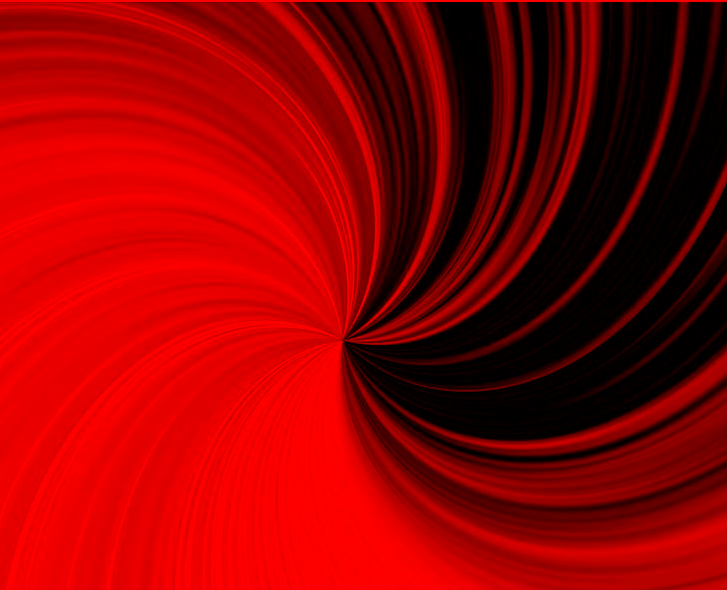

In [46]:
from PIL import Image
def display_only_red(image_path):
    """Displays an image with only the red channel."""
    
    with Image.open(image_path) as img:
        # Create a new image with the same size as the original
        red_image = Image.new("RGB", img.size)
        a,b=img.size
        print(a)
        # Iterate over each pixel in the image
        for x in range(img.width):
            for y in range(img.height):
                # Get the pixel RGB values
                r, g, b = img.getpixel((x, y))

                # Set green and blue channels to 0
                red_image.putpixel((x, y), (r, 0, 0))

        display(red_image)

# Example usage
display_only_red("/workspace/Data/Color2.jpeg")

In [53]:
from PIL import Image
from IPython.display import display
import math
path = "/workspace/Data/Mamica.jpeg" # Your image path 
img = Image.open(path)
width, height=img.size
# type(img)
# display(img)
# newimg = Image.new("RGB", (width, height), "green")

In [54]:
# newimg = Image.new("RGB", (width, height), "green")

newimgR = Image.new("RGB", (width, height), "white")
newimgG = Image.new("RGB", (width, height), "white")
newimgB = Image.new("RGB", (width, height), "white")
# type(newimg)
# display(newimg)
SobelIntensity=10
GetRed=True
GetBlue=True
GetGreen=True
for x in range(1, width-1):  # ignore the edge pixels for simplicity (1 to width-1)
    for y in range(1, height-1): # ignore edge pixels for simplicity (1 to height-1)

        # initialise Gx to 0 and Gy to 0 for every pixel
        GxR = 0
        GyR = 0
        GxG = 0
        GyG = 0
        GxB = 0
        GyB = 0
        # top left pixel
        p = img.getpixel((x-1, y-1))
        # type(p)
        # print(p)
        # pass
        r = p[0]
        g = p[1]
        b = p[2]

        # accumulate the value into Gx, and Gy
        if GetRed:
            GxR += -(SobelIntensity*r)
            GyR += -(SobelIntensity*r)
        if GetBlue:
            GxB += -(SobelIntensity*b)
            GyB += -(SobelIntensity*b)
        if GetGreen:
            GxG += -(SobelIntensity*g)
            GyG += -(SobelIntensity*g)

        # remaining left column
        p = img.getpixel((x-1, y))
        r = p[0]
        g = p[1]
        b = p[2]

        if GetRed:
            GxR += -2 * (SobelIntensity*r)
        if GetBlue:
            GxB += -2 * (SobelIntensity*b)
        if GetGreen:
            GxG += -2 * (SobelIntensity*g)

        p = img.getpixel((x-1, y+1))
        r = p[0]
        g = p[1]
        b = p[2]

        if GetRed:
            GxR += -(SobelIntensity*r)
            GyR += (SobelIntensity*r)
        if GetBlue:
            GxB += -(SobelIntensity*b)
            GyB += (SobelIntensity*b)
        if GetGreen:
            GxG += -(SobelIntensity*g)
            GyG += (SobelIntensity*g)
        

        # middle pixels
        p = img.getpixel((x, y-1))
        r = p[0]
        g = p[1]
        b = p[2]

        if GetRed:
            GyR += -2 * (SobelIntensity*r)
        if GetBlue:
            GyB += -2 * (SobelIntensity*b)
        if GetGreen:
            GyG += -2 * (SobelIntensity*g)
              
        p = img.getpixel((x, y+1))
        r = p[0]
        g = p[1]
        b = p[2]

        if GetRed:
            GyR += 2 * (SobelIntensity*r)
        if GetBlue:
            GyB += 2 * (SobelIntensity*b)
        if GetGreen:
            GyG += 2 * (SobelIntensity*g)

        # right column
        p = img.getpixel((x+1, y-1))
        r = p[0]
        g = p[1]
        b = p[2]

        if GetRed:
            GxR += (SobelIntensity*r)
            GyR += -(SobelIntensity*r)
        if GetBlue:
            GxB += (SobelIntensity*b)
            GyB += -(SobelIntensity*b)
        if GetGreen:
            GxG += (SobelIntensity*g)
            GyG += -(SobelIntensity*g)
        

        p = img.getpixel((x+1, y))
        r = p[0]
        g = p[1]
        b = p[2]

        if GetRed:
            GxR += 2 * (SobelIntensity*r)
        if GetBlue:
            GxB += 2 * (SobelIntensity*b)
        if GetGreen:
            GxG += 2 * (SobelIntensity*g)

        p = img.getpixel((x+1, y+1))
        r = p[0]
        g = p[1]
        b = p[2]

        if GetRed:
            GxR += (SobelIntensity*r)
            GyR += (SobelIntensity*r)
        if GetBlue:
            GxB += (SobelIntensity*b)
            GyB += (SobelIntensity*b)
        if GetGreen:
            GxG += (SobelIntensity*g)
            GyG += (SobelIntensity*g)

        # calculate the length of the gradient (Pythagorean theorem)
        if GetRed:
            lengthR = math.sqrt((GxR * GxR) + (GyR * GyR))
            lengthR = lengthR / 4328 * 255
            lengthR = int(lengthR)
            newimgR.putpixel((x,y),(lengthR,lengthR,lengthR))
        if GetBlue:
            lengthB = math.sqrt((GxB * GxB) + (GyB * GyB))
            lengthB = lengthB / 4328 * 255
            lengthB = int(lengthB)
            newimgB.putpixel((x,y),(lengthB,lengthB,lengthB))
        if GetGreen:
            lengthG = math.sqrt((GxG * GxG) + (GyG * GyG))
            lengthG = lengthG / 4328 * 255
            lengthG = int(lengthG)
            newimgG.putpixel((x,y),(lengthG,lengthG,lengthG))

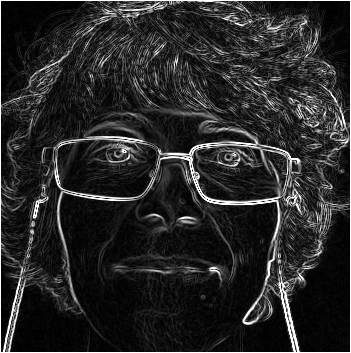

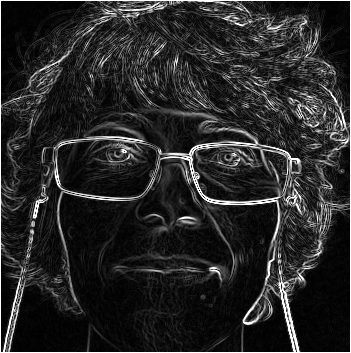

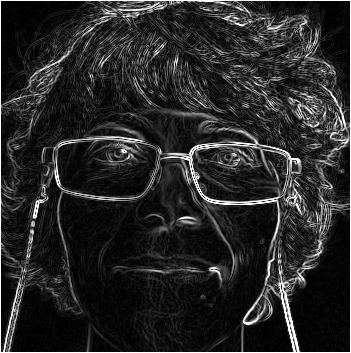

In [55]:
display(newimgR)
display(newimgG)
display(newimgB)